In [14]:
import pandas as pd
import numpy as np

# Load the dataset from the specific sheet
file_path = r"C:\Users\Acer\Desktop\Data Sci Assignments\Decision Tree\heart_disease.xlsx"
data = pd.read_excel(file_path, sheet_name='Heart_disease')

# Display the first few rows of the dataset to understand its structure
print(data.head())
print(data.info())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

In [16]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values by dropping rows with any missing values
data = data.dropna()

# Verify that there are no NaN values left
print(data.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [17]:
# Convert categorical variables to numeric using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the dataset to confirm changes
print(data.head())


   age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Male  \
0   63       145   233   True     150      2.3    0         1   
1   41       135   203  False     132      0.0    0         1   
2   57       140   192  False     148      0.4    0         1   
3   52       118   186  False     190      0.0    0         1   
4   57       110   201  False     126      1.5    0         1   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                   0               0                  1               0   
1                   1               0                  0               1   
2                   0               0                  0               1   
3                   0               0                  1               0   
4                   0               0                  0               1   

   restecg_st-t abnormality  exang_True  exang_FALSE  slope_flat  \
0                         0           0            0           0   
1               

In [23]:
# Define feature columns and target column
feature_columns = data.columns[:-1]
target_column = data.columns[-1]

# Split the data into features (X) and target (y)
X = data[feature_columns]
y = data[target_column]

# Verify that there are no NaN values left
print(X.isnull().sum())
print(y.isnull().sum())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Decision Tree Classification model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # Change 'binary' to 'micro', 'macro', or 'weighted' as needed
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1-score:", f1_score(y_test, y_pred, average='binary'))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
dtype: int64
0
Accuracy: 0.7705882352941177
Precision: 0.676056338028169
Recall: 0.75
F1-score: 0.7111111111111111
ROC-AUC: 0.7665094339622641


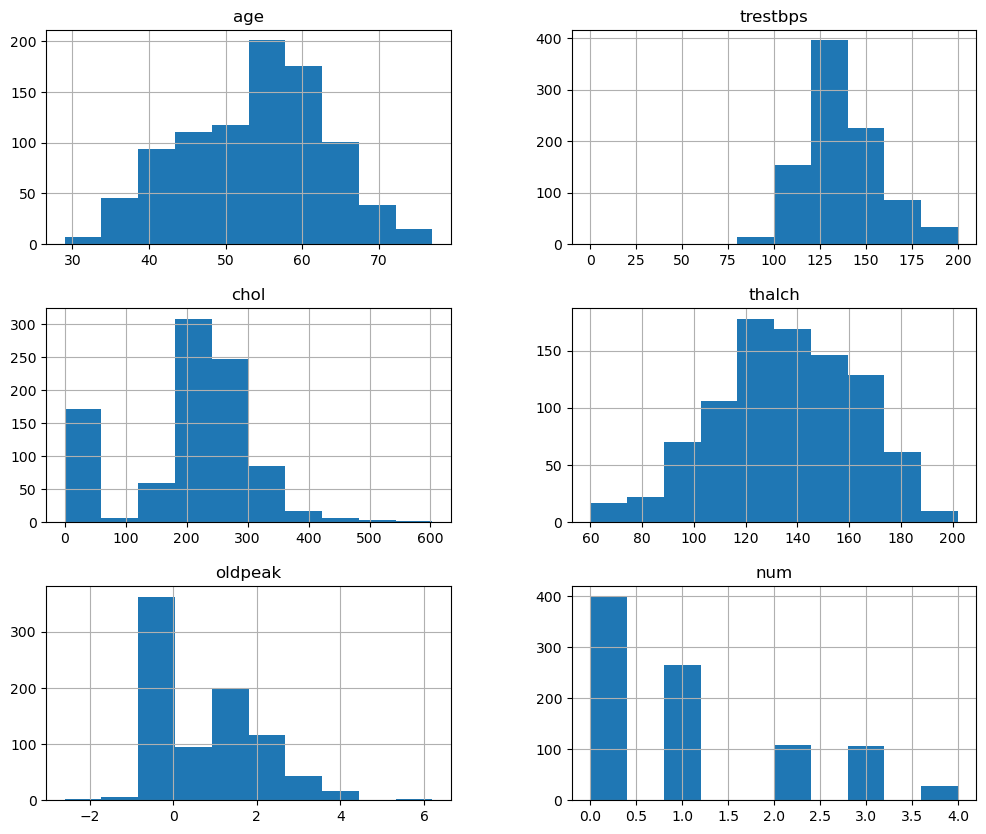

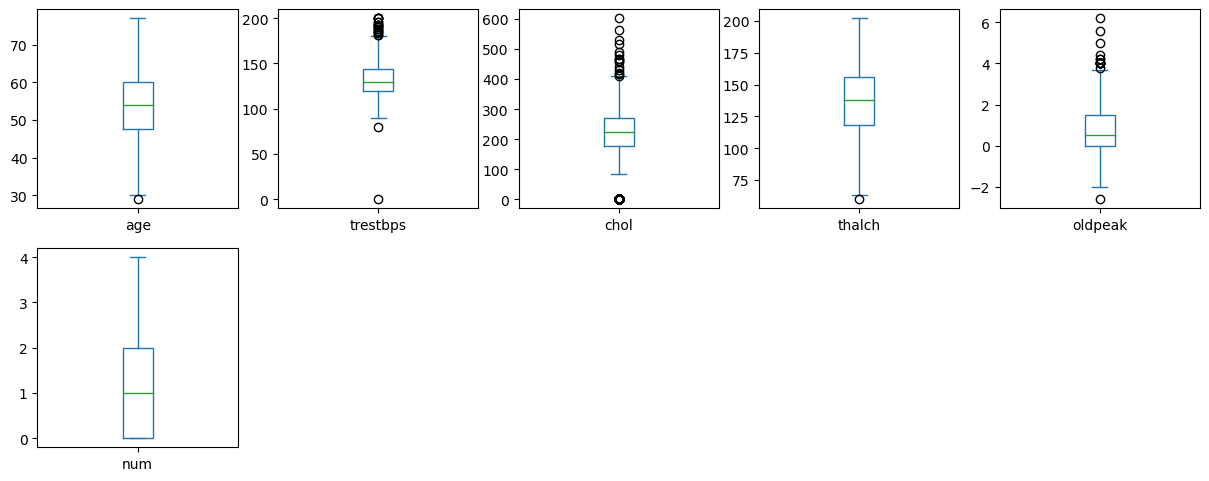

               age  trestbps      chol       fbs    thalch   oldpeak       num
age       1.000000  0.253999 -0.099967  0.176702 -0.328088  0.242662  0.326493
trestbps  0.253999  1.000000  0.117488  0.111614 -0.133360  0.167131  0.137251
chol     -0.099967  0.117488  1.000000 -0.113721  0.197907  0.029898 -0.238813
fbs       0.176702  0.111614 -0.113721  1.000000 -0.065428  0.024365  0.156268
thalch   -0.328088 -0.133360  0.197907 -0.065428  1.000000 -0.139598 -0.323058
oldpeak   0.242662  0.167131  0.029898  0.024365 -0.139598  1.000000  0.437577
num       0.326493  0.137251 -0.238813  0.156268 -0.323058  0.437577  1.000000


In [15]:
# Visualize the distribution of features
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.show()

# Box plots for each feature
data.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 15))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)


In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
y_pred_tuned = best_clf.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Precision:", precision_score(y_test, y_pred_tuned, average='binary'))
print("Tuned Recall:", recall_score(y_test, y_pred_tuned, average='binary'))
print("Tuned F1-score:", f1_score(y_test, y_pred_tuned, average='binary'))
print("Tuned ROC-AUC:", roc_auc_score(y_test, y_pred_tuned))


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Tuned Accuracy: 0.7588235294117647
Tuned Precision: 0.6236559139784946
Tuned Recall: 0.90625
Tuned F1-score: 0.7388535031847134
Tuned ROC-AUC: 0.7880306603773584


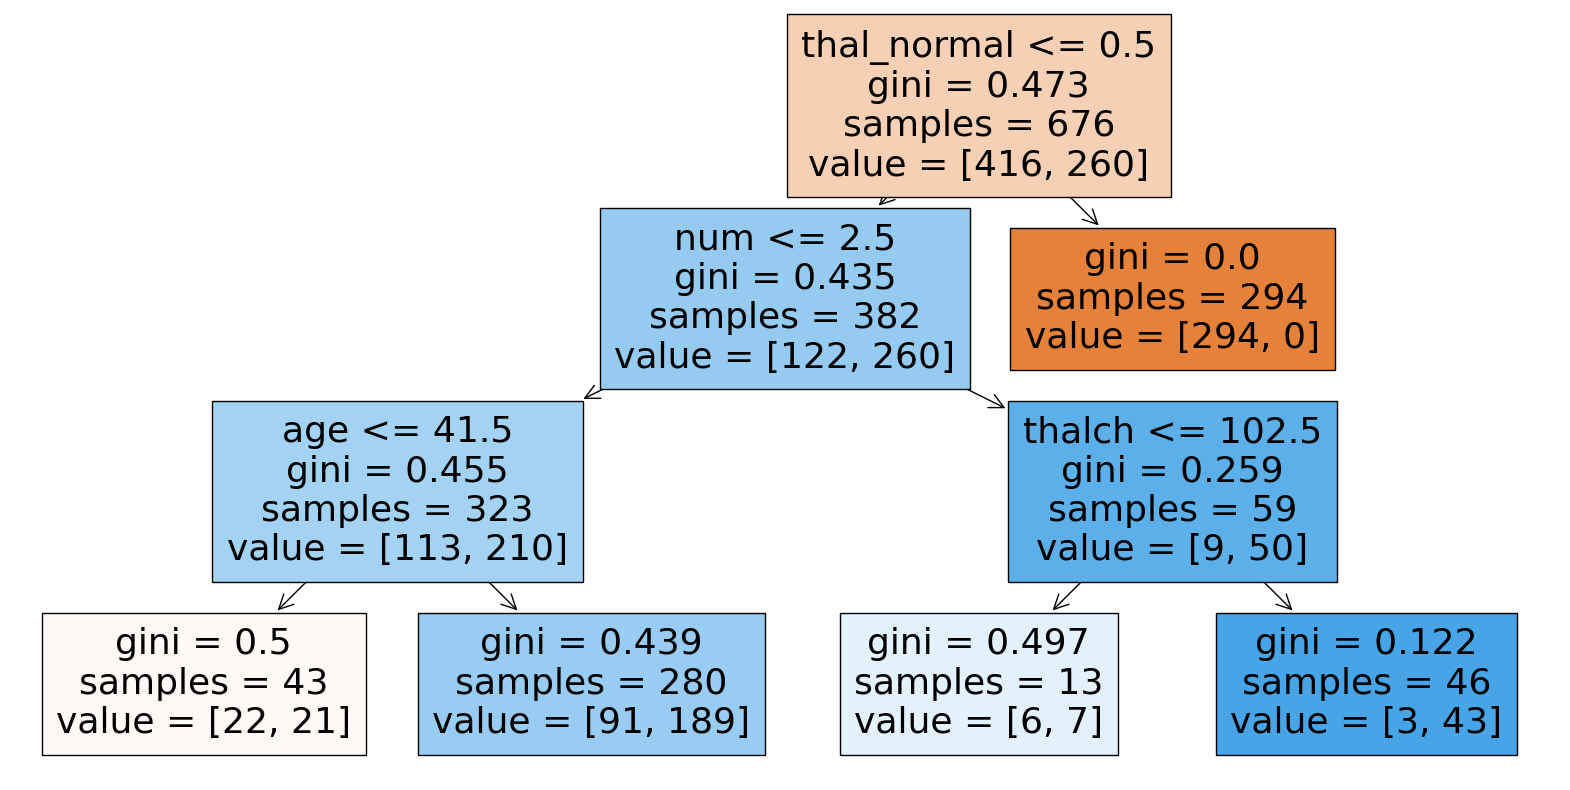

                     Feature  Importance
17               thal_normal    0.940922
6                        num    0.023743
4                     thalch    0.019463
0                        age    0.015873
3                        fbs    0.000000
5                    oldpeak    0.000000
2                       chol    0.000000
7                   sex_Male    0.000000
8         cp_atypical angina    0.000000
1                   trestbps    0.000000
10         cp_typical angina    0.000000
11            restecg_normal    0.000000
12  restecg_st-t abnormality    0.000000
13                exang_True    0.000000
14               exang_FALSE    0.000000
15                slope_flat    0.000000
16           slope_upsloping    0.000000
9             cp_non-anginal    0.000000


In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=feature_columns, filled=True)
plt.show()

# Identify important features
feature_importances = best_clf.feature_importances_
features = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
print(features)
